<h1>Model 2: Potential Ports in Demand from 2002 to 2022 (Historial Data Analysis)</h1>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
from seaborn import heatmap
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import datetime
from datetime import datetime # for strptime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import math # for rounding up values
%matplotlib inline
sns.set()
pd.options.display.max_rows = 4000
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('CR_COST_1.csv', converters={'PARTY_ID' : str, 'PORT_ID': str,  'CNTR_TYPE': str})
df['ETD_POL_D'] = pd.to_datetime(df['ETD_POL_D'])
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108465 entries, 0 to 108464
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   COST_RATE  108465 non-null  float64       
 1   PARTY_ID   108465 non-null  object        
 2   POD_ID     108465 non-null  object        
 3   ETD_POL_D  108464 non-null  datetime64[ns]
 4   CNTR_SIZE  108465 non-null  int64         
 5   CNTR_TYPE  108465 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 5.0+ MB


In [2]:
def RMSE(xAxis, yAxis):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(xAxis, yAxis, test_size=0.3)

    # Fit the polynomial to the training data
    z = np.polyfit(X_train, y_train, 1)
    p = np.poly1d(z)

    # Make predictions using the test set
    y_pred = p(X_test)

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE: ", rmse)

C:\Users\it1\AppData\Local\Temp\ipykernel_20500\1831394154.py:55: RankWarning: Polyfit may be poorly conditioned
  grp_c_plot(df,'AEDXB')


The total number of entries 1740 for AEDXB.
The gradient of the trendline is 2.1321298424139804e-81.
RMSE:  1.1651065669914782


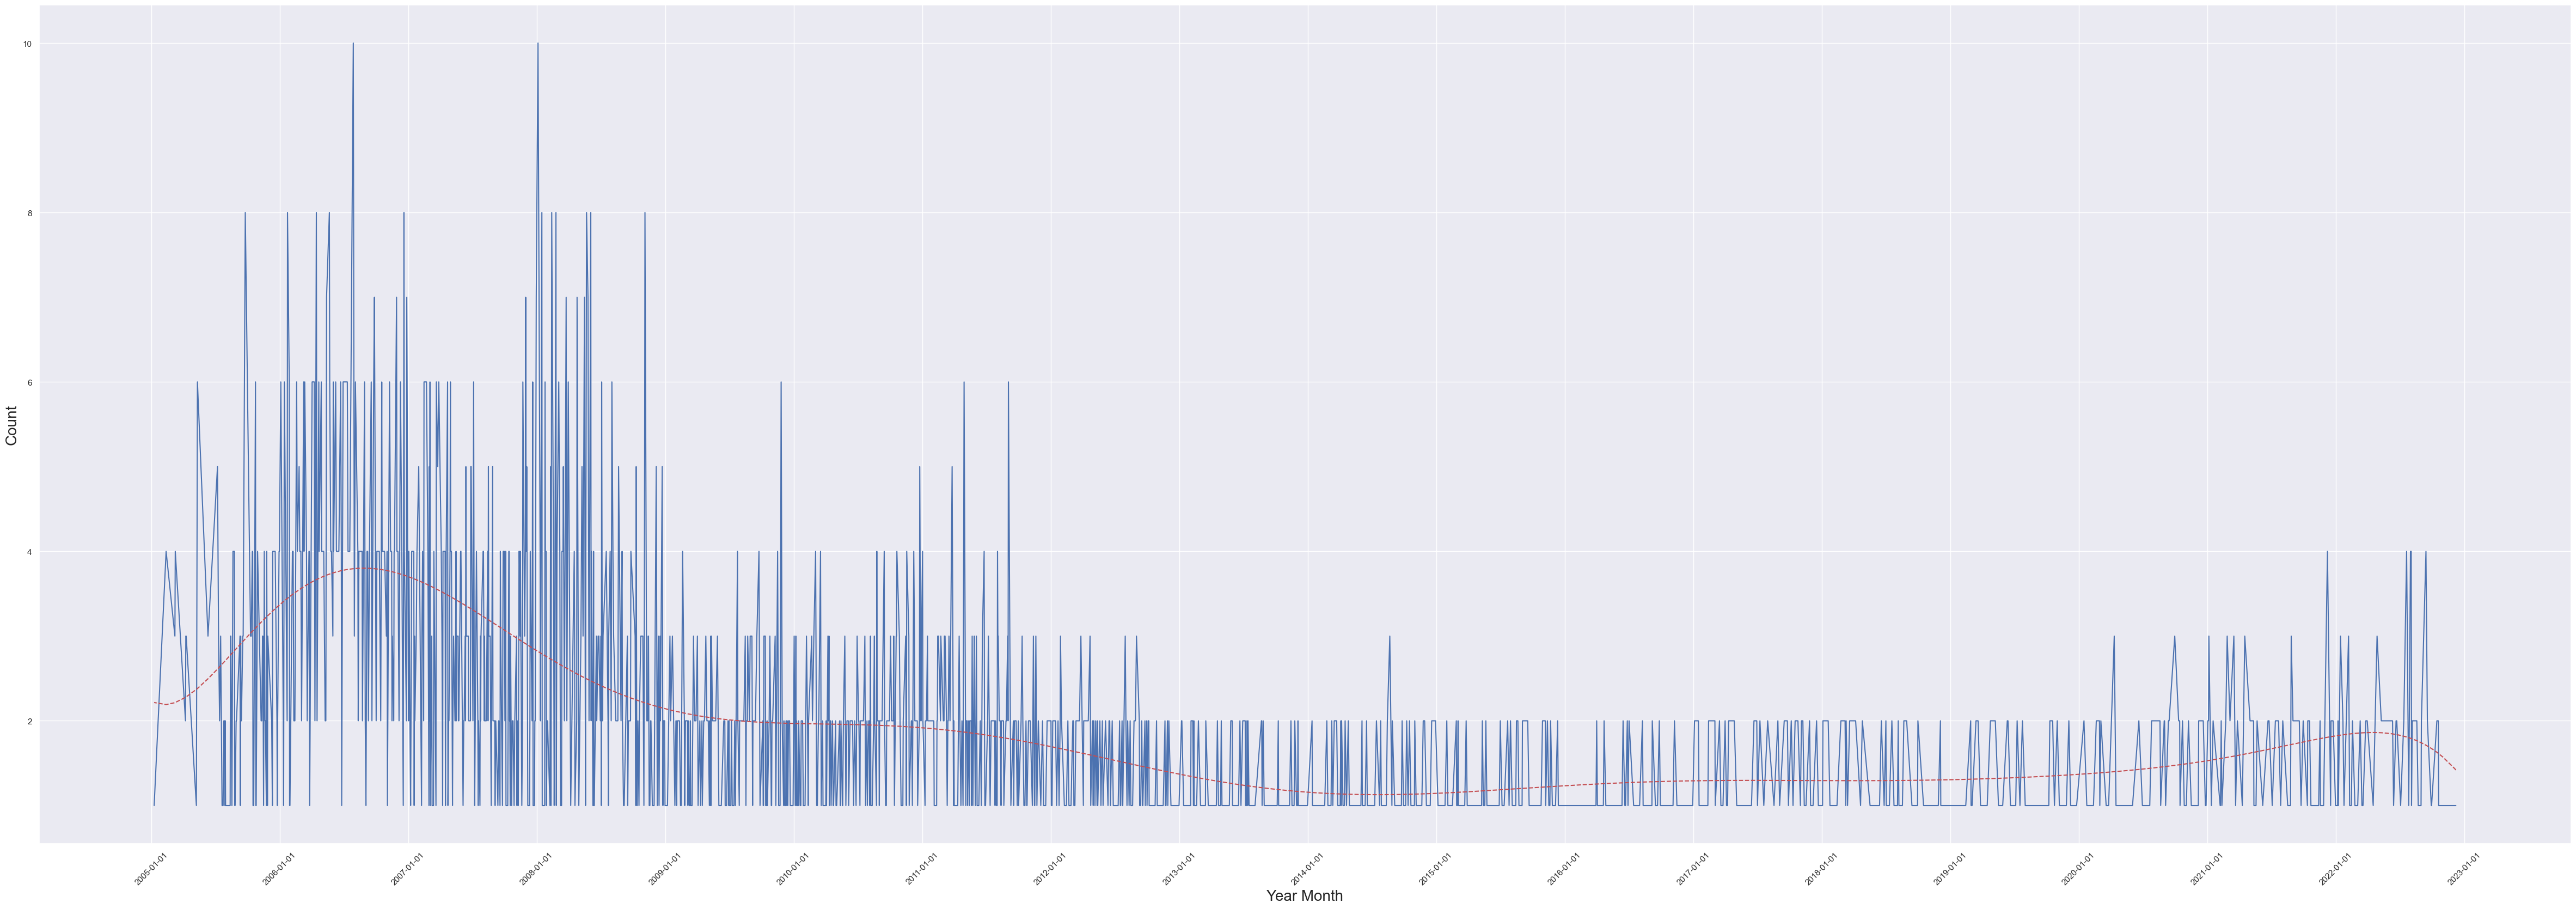

In [3]:
def grp_c_plot(df, port):
    # 1. Initialize variables to keep track of the year, port count, and dataframe of the specified port
    xAxis = []
    yAxis = []
    port_df = df[df["POD_ID"] == port]
    
    # 2. Group the data by year and get the unique years
    year_groups = port_df.groupby(df['ETD_POL_D'])
    unique_years = year_groups.groups.keys()
    
    # 3. Loop through the unique years and get the port count for each year
    for year in unique_years:
        year_df = year_groups.get_group(year)
        xAxis.append(year)
        yAxis.append(len(year_df))
    
    # 4. Reverse the x and y axis lists to plot the data in chronological order
    xAxis.reverse() # Date
    yAxis.reverse() # Count
    
    # 5. Convert the year strings to dates for the x axis
    xAxis = mdates.date2num(xAxis)

    # 6. Calculate and plot the trendline 
    z = np.polyfit(xAxis, yAxis, 21, rcond=None, full=False, w=None, cov=False)

    print("The total number of entries "  + str(len(yAxis)) + " for " + port + ".")
    print("The gradient of the trendline is " + str(z[0]) + ".")
                
    # 7. Plot the graph
    fig, ax = plt.subplots(figsize=(60, 20), linewidth=5)
    ax.plot(xAxis[::1], yAxis[::1])

    # 8. Set the tick intervals
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())

    # 9. Set the x-axis date format
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  

    # 10. Graph Settings
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=45)
    plt.xlabel("Year Month", fontsize=20)
    plt.ylabel("Count", fontsize=20)

    # 11. Plot trendline on to graph
    p = np.poly1d(z)
    plt.plot(xAxis, p(xAxis), "r--")

    RMSE(xAxis, yAxis)
    

grp_c_plot(df,'AEDXB')
# Loop through the unique years and get the port count for each year
# for ports in unique_ports:
#     grp_c_plot(df,ports)
    

<h3>In the chart above i used a 20 degree to fit the polynomial. We have to determine if this is the best fit.</h3>
<p>
    Determining the best degree for the polynomial fit can be somewhat subjective and will depend on the specific data you are working with. However, there are some general guidelines that can be followed:
    <ol>
        <li>Visual inspection: A good way to determine the best degree for the polynomial fit is to plot the data and try different degrees of polynomials. You can then visually inspect the plots and choose the degree that results in the best fit.</li><br>
        <li>Underfitting vs. Overfitting: You want to find a balance between underfitting and overfitting. A low degree polynomial may underfit the data, not capturing the underlying trend. On the other hand, a high degree polynomial may overfit the data, fitting the noise instead of the underlying trend.</li><br>
        <li>Root mean square error(RMSE): You can also use the Root mean square error (RMSE) of the predictions as a measure of goodness of fit. Lower RMSE values indicate a better fit.</li><br>
        <li>R-squared value: R-squared value can also be used as a measure of goodness of fit, where values closer to 1 indicate a better fit.</li><br>
        <li>Cross-validation: Using cross-validation techniques like k-fold validation to get more robust estimate of the model.</li><br>
    </ol>
</p>